In [1]:
# auto-reload changed source files when they are imported
%reload_ext autoreload
%autoreload 2

# add top repo dir to path so that src can be imported
import sys
sys.path.append("..")

%matplotlib inline

# Imports

In [2]:
from src.data import load_raman_spectra, load_crystal_structures
import glob
import numpy as np
from collections import Counter
import torch_geometric as pyg
import codecs
import torch
import torch_geometric

# Raman

In [3]:
fp = "../data/raw/raman/excellent_unoriented/Abelsonite__R070007__Raman__532__0__unoriented__Raman_Data_Processed__27040.txt"
model_wavenumber_values = np.arange(1000.0,500.0,-10.0)
load_raman_spectra.load_single_raman_spectrum(model_wavenumber_values,fp)

('Abelsonite',
 532,
 array([0.69842711, 0.69896184, 0.69858846, 0.74643274, 0.72949345,
        0.78793888, 0.60722956, 0.29508071, 0.29044808, 0.28043752,
        0.46705985, 0.13422788, 0.00596951, 0.02407432, 0.02073675,
        0.1360224 , 0.14793432, 0.58032796, 0.39205618, 0.10990508,
        0.40412146, 0.2598797 , 0.38066561, 0.14850761, 1.        ,
        0.53162272, 0.00499501, 0.11940523, 0.56775302, 0.51175452,
        0.39550698, 0.05001148, 0.04802603, 0.00930858, 0.00532165,
        0.26057371, 0.09667703, 0.02044032, 0.10936421, 0.12025251,
        0.05948381, 0.08570629, 0.06823977, 0.02057031, 0.04822269,
        0.11819594, 0.05236448, 0.05744564, 0.10953358, 0.19399357]))

In [4]:
model_wavenumber_values = np.arange(1000.0,500.0,-10.0)
chosen_wavelength = 514
raman_file_paths, raman_mineral_names, raman_spectra, raman_wavelengths = load_raman_spectra.load_raman_data(model_wavenumber_values,wavelength=chosen_wavelength)

In [5]:
print(len(raman_mineral_names))
print("wavelengths:",dict(Counter(raman_wavelengths))) # So, probably just go for 514 nm wavelength
print("minerals:",dict(Counter(raman_mineral_names)))
# consider removing minerals with fewer than 1-2 spectra

4130
wavelengths: {514: 4130}
minerals: {'Actinolite': 61, 'Adamite': 20, 'Aegirine': 26, 'Aenigmatite': 15, 'Afmite': 1, 'Akermanite': 12, 'Albite': 70, 'Almandine': 25, 'Amblygonite': 19, 'Amesite': 6, 'Analcime': 17, 'Anatase': 6, 'Andalusite': 56, 'Andradite': 26, 'Anglesite': 24, 'Anhydrite': 20, 'Ankerite': 14, 'Annite': 26, 'Anorthite': 38, 'Aragonite': 19, 'Arfvedsonite': 12, 'Arsenopyrite': 12, 'Astrophyllite': 34, 'Atacamite': 9, 'Augelite': 14, 'Augite': 33, 'AxiniteFe': 104, 'Azurite': 24, 'Baddeleyite': 24, 'Barrerite': 10, 'Barysilite': 7, 'Baryte': 86, 'Bertrandite': 9, 'Beryl': 66, 'Bikitaite': 19, 'Bobdownsite': 7, 'Boleite': 4, 'Braunite': 21, 'Brazilianite': 38, 'Brookite': 19, 'Brucite': 7, 'Bustamite': 20, 'Calcite': 40, 'Cancrinite': 7, 'Carrollite': 6, 'Cassiterite': 25, 'Catapleiite': 35, 'Celestine': 20, 'Cerussite': 56, 'ChabaziteCa': 14, 'Chalcopyrite': 4, 'Chenevixite': 4, 'Chloritoid': 25, 'Chlormayenite': 1, 'Chondrodite': 13, 'Chrysoberyl': 9, 'Clinochlor

# Crystal structures

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 [2.53523972 1.46092428 1.58500629] 0.93 0.95 1.0453884981633847
1 Li 3 6.94 [2.53523972 1.46092428 1.58500629] 0.98 0.05 1.0453884981633847
2 Al 13 26.982 [0. 0. 0.] 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 [0. 0. 0.] 1.83 0.09 0.4374208670562803
4 As 33 74.922 [-0.75421028  2.6759083   1.58500629] 2.18 1.0 0.3979424494519229
5 O 8 15.999 [0.05232366 3.70416148 2.63447066] 3.44 1.0 0.7540377762432269
6 O 8 15.999 [0.33533372 1.7275368  0.71699345] 3.44 1.0 0.6616582790490306
7 F 9 18.998 [-2.26263084  0.57040106  4.75501887] 3.98 0.73 0.5676996451506598
8 O 8 15.999 [-2.26263084  0.57040106  4.75501887] 3.44 0.27 0.5676996451506598


C:\Users\gordon\anaconda3\envs\cs224wproj\lib\site-packages\torch_geometric\utils\convert.py:164: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  data[key] = torch.tensor(value)


Data(x=[9, 5], edge_index=[2, 66], pos=[9, 3], element=[9], z=[9], dist=[66])

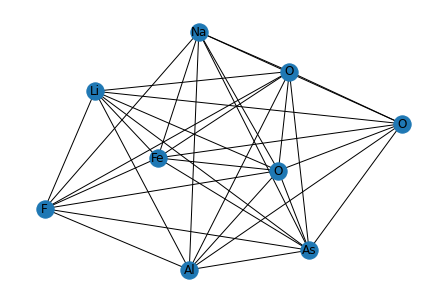

In [6]:
fp = "../data/raw/CIFs2/Acuminite0010999.cif"
fp = "../data/raw/CIFs2/Durangite0019593.cif"
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,verbose=True)
pyg.utils.convert.from_networkx(G)

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 [2.53523972 1.46092428 1.58500629] 0.93 0.95 1.0453884981633847
1 Li 3 6.94 [2.53523972 1.46092428 1.58500629] 0.98 0.05 1.0453884981633847
2 Al 13 26.982 [0. 0. 0.] 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 [0. 0. 0.] 1.83 0.09 0.4374208670562803
4 As 33 74.922 [-0.75421028  2.6759083   1.58500629] 2.18 1.0 0.3979424494519229
5 O 8 15.999 [0.05232366 3.70416148 2.63447066] 3.44 1.0 0.7540377762432269
6 O 8 15.999 [0.33533372 1.7275368  0.71699345] 3.44 1.0 0.6616582790490306
7 F 9 18.998 [-2.26263084  0.57040106  4.75501887] 3.98 0.73 0.5676996451506598
8 O 8 15.999 [-2.26263084  0.57040106  4.75501887] 3.44 0.27 0.5676996451506598


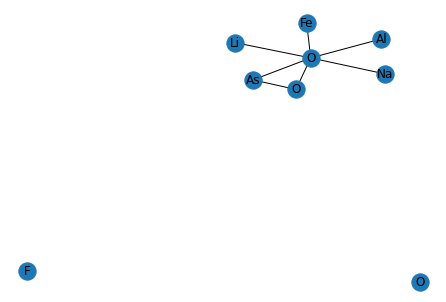

In [7]:
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,max_distance_for_edge=3.0,verbose=True)

In [8]:
# cif_file_paths, cif_mineral_names, cif_graphs = load_crystal_structures.load_cif_data()
# print(cif_mineral_names)

In [9]:
cif_mineral_names = []
cif_graphs = []
big_cif_file_path = '../data/raw/cifdata.txt'
temp_file_path = '../data/raw/tempcif.txt'
cur_mineral_name = ''
cur_cif_lines = []
with open(big_cif_file_path,'r',errors='ignore') as f:
    for line in f:
        if line.startswith("_chemical_formula_sum ''"):
            continue
        if line.startswith('_chemical_name_mineral'):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('_amcsd_formula_title '):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('END'):
            try:
                with codecs.open(temp_file_path,'w','utf-8') as out:
                    out.write(''.join(cur_cif_lines))
                _,G = load_crystal_structures.load_single_crystal_structure(
                                                temp_file_path,
                                                min_distance_for_edge=-1,
                                                max_distance_for_edge=np.inf,
                                                )
                cif_graphs.append(G)
                cif_mineral_names.append(cur_mineral_name)
            except:
                pass
            cur_cif_lines = []
        else:
            cur_cif_lines.append(line)

12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to fin

Unexpected error:
Unexpected error:


13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
11:0: Trying to find one of data_value_1, start_sc_line
>  _journal_year 1974
>  ^
11:0:

In [10]:
# print(dict(Counter(cif_mineral_names)))

# Combine

### Decide on minerals

In [11]:
all_minerals = set(cif_mineral_names+raman_mineral_names)
cif_counter = Counter(cif_mineral_names)
raman_counter = Counter(raman_mineral_names)
minimum_number_for_each = 10
minerals_for_dataset = []
for mineral in all_minerals:
    if cif_counter[mineral] >= minimum_number_for_each and raman_counter[mineral] >= minimum_number_for_each:
        minerals_for_dataset.append(mineral)
minerals_for_dataset.remove('Diamond')
print(minerals_for_dataset)
print(len(minerals_for_dataset),'/',len(all_minerals))

['Hedenbergite', 'Andalusite', 'Fluorapatite', 'Covellite', 'Datolite', 'Clinozoisite', 'Jadeite', 'Forsterite', 'Akermanite', 'Beryl', 'Zoisite', 'Witherite', 'Muscovite', 'Braunite', 'Topaz', 'Fluorite', 'Tremolite', 'Natrolite', 'Annite', 'Polylithionite', 'Microcline', 'Diaspore', 'Fayalite', 'Dolomite', 'Diopside', 'Corundum', 'Vesuvianite', 'Pyrope', 'Kyanite', 'Titanite', 'Monticellite', 'Montebrasite', 'Grossular', 'Lawsonite', 'Actinolite', 'Enstatite', 'Marialite', 'Serandite', 'Spodumene', 'Staurolite', 'Aegirine', 'Orthoclase', 'Cordierite', 'Dravite', 'Chondrodite', 'Eudialyte', 'Rhodonite', 'Albite', 'Ilvaite', 'Calcite', 'Aragonite', 'Almandine', 'Phenakite', 'Andradite', 'Anorthite']
55 / 7329


### Pair them up

In [12]:
data_list = []
print(len(cif_mineral_names),len(cif_graphs))
for mineral in minerals_for_dataset:
    cur_mineral_raman_indices = [i for i, x in enumerate(raman_mineral_names) if x == mineral]
    cur_mineral_graph_indices = [i for i, x in enumerate(cif_mineral_names) if x == mineral]
    for i_raman, i_graph in zip(cur_mineral_raman_indices,cur_mineral_graph_indices):
        # print(i_raman, i_graph)
        cur_graph = pyg.utils.convert.from_networkx(cif_graphs[i_graph])
        cur_graph['y'] = raman_spectra[i_raman]
        data_list.append(cur_graph)


18241 18241


In [13]:
print(len(data_list))
print(data_list[0])

1228
Data(x=[6, 5], edge_index=[2, 30], pos=[6, 3], element=[6], z=[6], dist=[30], y=[50])


In [16]:
save_path = '../data/processed/v1.pt'
data, slices, _ = torch_geometric.data.collate.collate(
    data_list[0].__class__,
    data_list=data_list,
    increment=False,
    add_batch=False,
)
collated_data = (data, slices)
torch.save(collated_data, save_path)